In [2]:
import numpy as np
import pandas as pd

In [3]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


Following what the papers say as "statistically significant"

In [4]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [5]:
# to predict mortality, these columns are considered important
mortality_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'GradeofKidneyCategory',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'GENDER'
]

mortality_cares = cares[mortality_significant_columns + ['Mortality']]

In [6]:
mortality_cares = mortality_cares.dropna(how='any')

In [7]:
mortality_cares.shape

(76064, 15)

In [8]:
mortality_cares["Mortality"].isna().value_counts()

Mortality
False    76064
Name: count, dtype: int64

In [9]:
mortality_cares["Mortality"].value_counts()

Mortality
0    71083
1     4981
Name: count, dtype: int64

In [10]:
icu_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'GradeofKidneyCategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'PriorityCategory',
    'GENDER'
]
# same as mortality, but with surgical priority column (Priority Category)

icu_cares = cares[icu_significant_columns + ["ICUAdmgt24h"]]

In [11]:
icu_cares = icu_cares.dropna(how='any')

In [12]:
icu_cares["ICUAdmgt24h"].value_counts()

ICUAdmgt24h
0    75008
1     1056
Name: count, dtype: int64

In [83]:
icu_cares.shape

(76064, 16)

Save as CSV

In [13]:
mortality_cares.to_csv("../data/CARES_mortality_dropna.csv", index=False)
icu_cares.to_csv("../data/CARES_ICU_dropna.csv", index=False)

# Simple Modeling

## Mortality

In [177]:
RANDOM_SEED = 3402

In [178]:
np.random.seed(RANDOM_SEED)

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X = mortality_cares.drop('Mortality', axis=1)
y = mortality_cares['Mortality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

Oversampling

In [181]:
from imblearn.over_sampling import SMOTE

In [182]:
smote = SMOTE()

x_res, y_res = smote.fit_resample(x_train, y_train)

In [183]:
evaluation_tpr_fpr = {}

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [185]:
logreg_mort = LogisticRegression(random_state=RANDOM_SEED)
rf_mort = RandomForestClassifier(random_state=RANDOM_SEED)

# apply the same for smote data
logreg_mort_smote = LogisticRegression(random_state=RANDOM_SEED)
rf_mort_smote = RandomForestClassifier(random_state=RANDOM_SEED)

#### Logistic Regression

In [186]:
logreg_mort.fit(x_train, y_train)
logreg_mort_smote.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [187]:
rf_mort.fit(x_train, y_train)
rf_mort_smote.fit(x_res, y_res)

RandomForestClassifier(random_state=3402)

In [188]:
y_pred = logreg_mort.predict(x_test)
y_pred_proba = logreg_mort.predict_proba(x_test)

In [189]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.51      0.10      0.17      1494

    accuracy                           0.93     22820
   macro avg       0.72      0.55      0.57     22820
weighted avg       0.91      0.93      0.91     22820



In [191]:
f1_score(y_test, y_pred)

0.16759776536312848

In [192]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [193]:
auc(fpr, tpr)

0.856316525597843

In [194]:
evaluation_tpr_fpr["Logistic Regression"] = (fpr, tpr)

#### Logistic Regression SMOTE

In [195]:
y_pred = logreg_mort_smote.predict(x_test)
y_pred_proba = logreg_mort_smote.predict_proba(x_test)

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     21326
           1       0.21      0.76      0.33      1494

    accuracy                           0.80     22820
   macro avg       0.59      0.78      0.60     22820
weighted avg       0.93      0.80      0.84     22820



In [197]:
f1_score(y_test, y_pred)

0.3267197682838523

In [198]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [199]:
auc(fpr, tpr)

0.8519515085569701

In [200]:
evaluation_tpr_fpr["Logistic Regression SMOTE"] = (fpr, tpr)

#### Random Forest

In [201]:
y_pred = rf_mort.predict(x_test)
y_pred_proba = rf_mort.predict_proba(x_test)

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21326
           1       0.43      0.15      0.23      1494

    accuracy                           0.93     22820
   macro avg       0.69      0.57      0.60     22820
weighted avg       0.91      0.93      0.92     22820



In [203]:
f1_score(y_test, y_pred)

0.22702702702702704

In [204]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.8061623781066309

In [205]:
evaluation_tpr_fpr["Random Forest"] = (fpr, tpr)

#### Random Forest SMOTE

In [206]:
y_pred = rf_mort_smote.predict(x_test)
y_pred_proba = rf_mort_smote.predict_proba(x_test)

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     21326
           1       0.21      0.50      0.30      1494

    accuracy                           0.84     22820
   macro avg       0.59      0.69      0.60     22820
weighted avg       0.91      0.84      0.87     22820



In [208]:
f1_score(y_test, y_pred)

0.29710001972775696

In [209]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.7535128164664033

In [210]:
evaluation_tpr_fpr["Random Forest SMOTE"] = (fpr, tpr)

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

#### Neural Net

In [213]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [214]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [215]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [216]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - auc: 0.6382 - f1_score: 0.1242 - loss: 0.2703 - val_auc: 0.8440 - val_f1_score: 0.1229 - val_loss: 0.1873
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8362 - f1_score: 0.1242 - loss: 0.1925 - val_auc: 0.8540 - val_f1_score: 0.1229 - val_loss: 0.1838
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - auc: 0.8460 - f1_score: 0.1242 - loss: 0.1879 - val_auc: 0.8562 - val_f1_score: 0.1229 - val_loss: 0.1833
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8408 - f1_score: 0.1218 - loss: 0.1875 - val_auc: 0.8587 - val_f1_score: 0.1229 - val_loss: 0.1830
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - auc: 0.8555 - f1_score: 0.1211 - loss: 0.1807 - val_auc: 0.8591 - val_f1_score: 0.1229 - val_loss: 0.1820
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - auc: 0.8511 - f1_score: 0.1254 - loss: 0.1872 - val_auc: 0.8595 - val_f1_score: 0.1229 - val_loss: 0.1822
Epoch 7/10
1664/

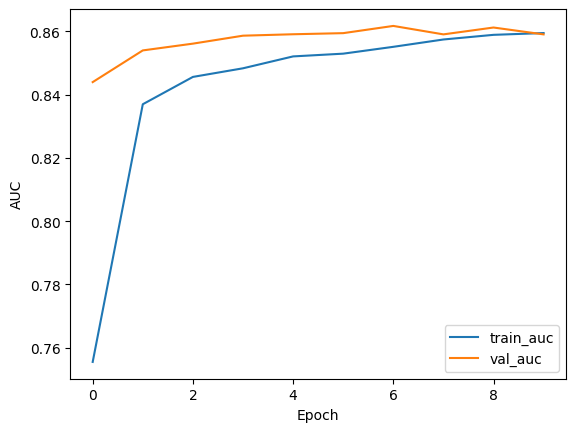

In [218]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [219]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [220]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8603644155539911

In [221]:
evaluation_tpr_fpr["Neural Net"] = (fpr, tpr)

#### Neural Net SMOTE

In [236]:
model_smote = Sequential()
model_smote.add(Input((X.shape[1],)))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(1, activation='sigmoid'))

In [237]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [238]:
model_smote.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
history = model_smote.fit(x_res, y_res, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - auc: 0.8251 - f1_score: 0.6656 - loss: 0.5157 - val_auc: 0.8532 - val_f1_score: 0.1229 - val_loss: 0.5357
Epoch 2/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.8612 - f1_score: 0.6647 - loss: 0.4648 - val_auc: 0.8543 - val_f1_score: 0.1229 - val_loss: 0.4547
Epoch 3/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - auc: 0.8620 - f1_score: 0.6663 - loss: 0.4639 - val_auc: 0.8519 - val_f1_score: 0.1229 - val_loss: 0.4522
Epoch 4/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - auc: 0.8655 - f1_score: 0.6659 - loss: 0.4581 - val_auc: 0.8496 - val_f1_score: 0.1229 - val_loss: 0.4382
Epoch 5/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.8684 - f1_score: 0.6654 - loss: 0.4534 - val_auc: 0.8510 - val_f1_score: 0.1229 - val_loss: 0.4567
Epoch 6/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - auc: 0.8686 - f1_score: 0.6667 - loss: 0.4531 - val_auc: 0.8489 - val_f1_score: 0.1229 - val_loss: 0.4122
Epoch 7/10
3110/

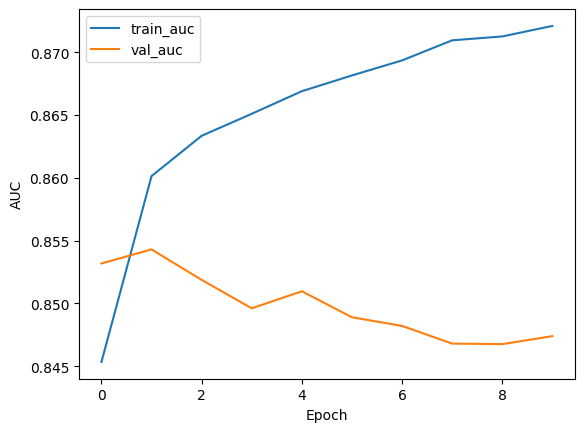

In [240]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [241]:
y_pred_proba = model_smote.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step


In [242]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8474585766869409

In [243]:
evaluation_tpr_fpr["Neural Net SMOTE"] = (fpr, tpr)

#### XGBoost

In [230]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.49      0.12      0.19      1494

    accuracy                           0.93     22820
   macro avg       0.72      0.56      0.58     22820
weighted avg       0.91      0.93      0.92     22820

0.19257665411511565


0.8559282300981725

In [231]:
evaluation_tpr_fpr["XGBoost"] = (fpr, tpr)

#### XGBoost SMOTE

In [245]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_res, y_res)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.97      0.85      0.90     21326
           1       0.22      0.61      0.32      1494

    accuracy                           0.83     22820
   macro avg       0.59      0.73      0.61     22820
weighted avg       0.92      0.83      0.87     22820

0.3213778409090909


0.804940651034536

In [246]:
evaluation_tpr_fpr["XGBoost SMOTE"] = (fpr, tpr)

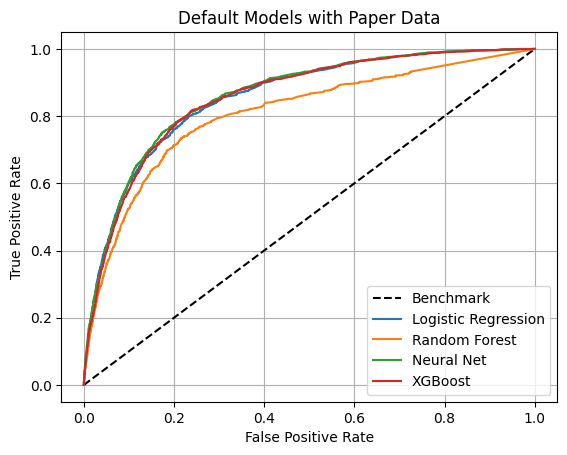

In [247]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    if "SMOTE" in model_name:
        continue
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

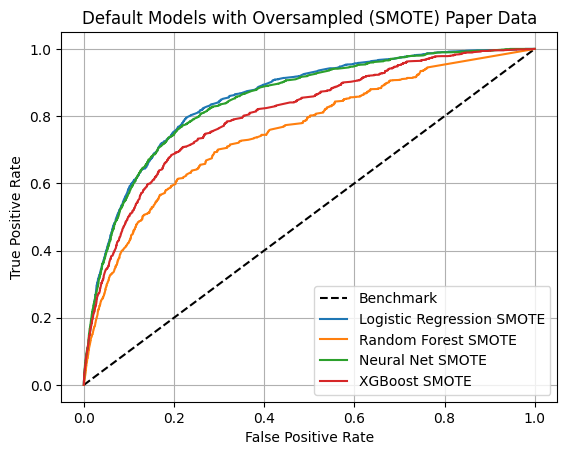

In [248]:
plt.title("Default Models with Oversampled (SMOTE) Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    if "SMOTE" not in model_name:
        continue
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

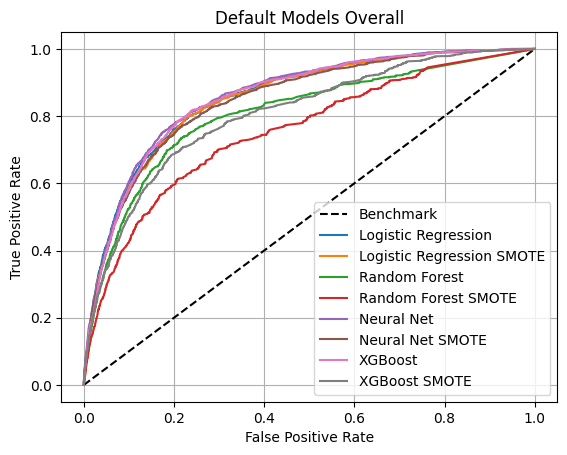

In [249]:
plt.title("Default Models Overall")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

## ICU

In [250]:
X = icu_cares.drop('ICUAdmgt24h', axis=1)
y = icu_cares['ICUAdmgt24h']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

In [251]:
x_res, y_res = smote.fit_resample(x_train, y_train)

In [252]:
evaluation_tpr_fpr = {}

In [253]:
x_res.shape

(105010, 15)

#### Logistic Regression

In [254]:
logreg_icu = LogisticRegression(random_state=RANDOM_SEED)

In [255]:
logreg_icu.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [256]:
y_pred = logreg_icu.predict(x_test)
y_pred_proba = logreg_icu.predict_proba(x_test)

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     22503
           1       0.06      0.78      0.11       317

    accuracy                           0.83     22820
   macro avg       0.53      0.80      0.51     22820
weighted avg       0.98      0.83      0.90     22820



In [258]:
f1_score(y_test, y_pred)

0.11299954065227377

In [259]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [260]:
auc(fpr, tpr)

0.8698077550403025

In [261]:
evaluation_tpr_fpr["Logistic Regression"] = (fpr, tpr)

#### Logistic Regression SMOTE

In [262]:
logreg_icu_smote = LogisticRegression(random_state=RANDOM_SEED)

In [263]:
logreg_icu_smote.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [264]:
y_pred = logreg_icu_smote.predict(x_test)
y_pred_proba = logreg_icu_smote.predict_proba(x_test)

In [265]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     22503
           1       0.06      0.78      0.11       317

    accuracy                           0.83     22820
   macro avg       0.53      0.80      0.51     22820
weighted avg       0.98      0.83      0.90     22820



In [266]:
f1_score(y_test, y_pred)

0.11299954065227377

In [267]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [268]:
auc(fpr, tpr)

0.8698077550403025

In [269]:
evaluation_tpr_fpr["Logistic Regression SMOTE"] = (fpr, tpr)

#### Random Forest

In [270]:
rf_icu = RandomForestClassifier(random_state=RANDOM_SEED)

In [271]:
rf_icu.fit(x_train, y_train)
y_pred = rf_icu.predict(x_test)
y_pred_proba = rf_icu.predict_proba(x_test)
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)
evaluation_tpr_fpr["Random Forest"] = (fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.22      0.06      0.09       317

    accuracy                           0.98     22820
   macro avg       0.60      0.53      0.54     22820
weighted avg       0.98      0.98      0.98     22820



#### Random Forest SMOTE


In [272]:
rf_icu_smote = RandomForestClassifier(random_state=RANDOM_SEED)
rf_icu_smote.fit(x_res, y_res)
y_pred = rf_icu_smote.predict(x_test)
y_pred_proba = rf_icu_smote.predict_proba(x_test)

In [273]:
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)
evaluation_tpr_fpr["Random Forest SMOTE"] = (fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22503
           1       0.05      0.21      0.08       317

    accuracy                           0.93     22820
   macro avg       0.52      0.58      0.52     22820
weighted avg       0.98      0.93      0.95     22820



#### Neural Network

In [274]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [275]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [276]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - auc: 0.5112 - f1_score: 0.0280 - loss: 0.1251 - val_auc: 0.8632 - val_f1_score: 0.0274 - val_loss: 0.0596
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - auc: 0.8459 - f1_score: 0.0274 - loss: 0.0596 - val_auc: 0.8765 - val_f1_score: 0.0274 - val_loss: 0.0559
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8570 - f1_score: 0.0273 - loss: 0.0566 - val_auc: 0.8666 - val_f1_score: 0.0274 - val_loss: 0.0556
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8506 - f1_score: 0.0264 - loss: 0.0556 - val_auc: 0.8705 - val_f1_score: 0.0274 - val_loss: 0.0556
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8778 - f1_score: 0.0273 - loss: 0.0553 - val_auc: 0.8746 - val_f1_score: 0.0274 - val_loss: 0.0550
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - auc: 0.8763 - f1_score: 0.0287 - loss: 0.0568 - val_auc: 0.8747 - val_f1_score: 0.0274 - val_loss: 0.0554
Epoch 7/10
1664/

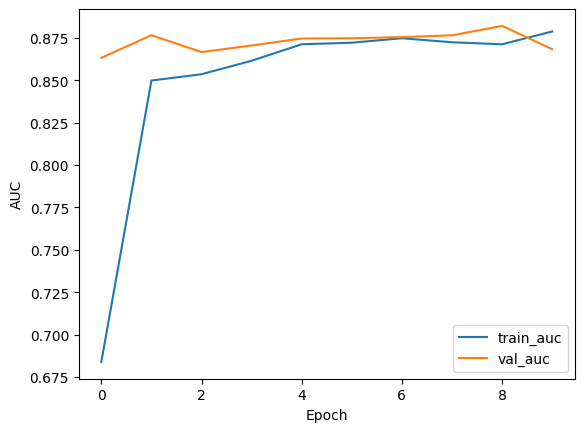

In [277]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [278]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step


In [280]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8880764723834228

In [281]:
evaluation_tpr_fpr["Neural Net"] = (fpr, tpr)

#### Neural Net SMOTE

In [282]:
model_smote = Sequential()

model_smote.add(Input((X.shape[1],)))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(1, activation='sigmoid'))

In [283]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])
model_smote.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [284]:
history = model_smote.fit(x_res, y_res, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - auc: 0.8632 - f1_score: 0.6689 - loss: 0.4589 - val_auc: 0.8556 - val_f1_score: 0.0274 - val_loss: 0.3778
Epoch 2/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - auc: 0.9051 - f1_score: 0.6655 - loss: 0.3885 - val_auc: 0.8440 - val_f1_score: 0.0274 - val_loss: 0.3743
Epoch 3/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - auc: 0.9130 - f1_score: 0.6663 - loss: 0.3716 - val_auc: 0.8371 - val_f1_score: 0.0274 - val_loss: 0.3531
Epoch 4/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - auc: 0.9170 - f1_score: 0.6677 - loss: 0.3632 - val_auc: 0.8372 - val_f1_score: 0.0274 - val_loss: 0.3896
Epoch 5/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.9203 - f1_score: 0.6666 - loss: 0.3553 - val_auc: 0.8317 - val_f1_score: 0.0274 - val_loss: 0.4132
Epoch 6/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.9244 - f1_score: 0.6653 - loss: 0.3466 - val_auc: 0.8182 - val_f1_score: 0.0274 - val_loss: 0.3627
Epoch 7/10
3282/

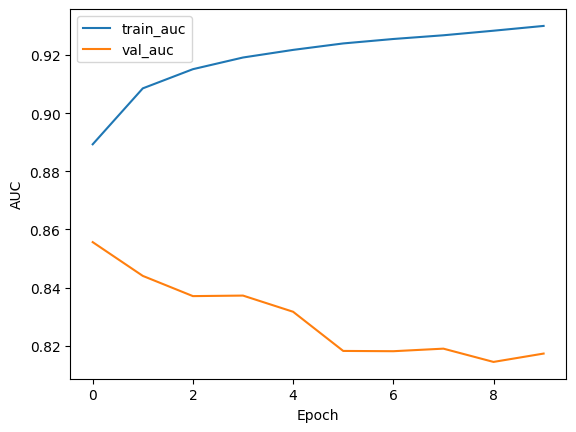

In [285]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [286]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step


In [287]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8880764723834228

In [288]:
evaluation_tpr_fpr["Neural Net SMOTE"] = (fpr, tpr)

#### XGBoost

In [289]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.32      0.09      0.13       317

    accuracy                           0.98     22820
   macro avg       0.65      0.54      0.56     22820
weighted avg       0.98      0.98      0.98     22820

0.13432835820895522


0.854122079201217

In [290]:
evaluation_tpr_fpr["XGBoost"] = (fpr, tpr)

In [291]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_res, y_res)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22503
           1       0.07      0.40      0.12       317

    accuracy                           0.92     22820
   macro avg       0.53      0.66      0.54     22820
weighted avg       0.98      0.92      0.95     22820

0.12026515151515152


0.7331274862615584

In [292]:
evaluation_tpr_fpr["XGBoost SMOTE"] = (fpr, tpr)

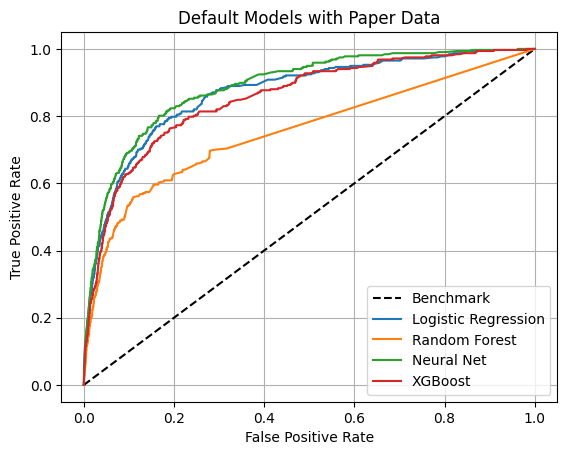

In [293]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    if "SMOTE" in model_name:
        continue
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

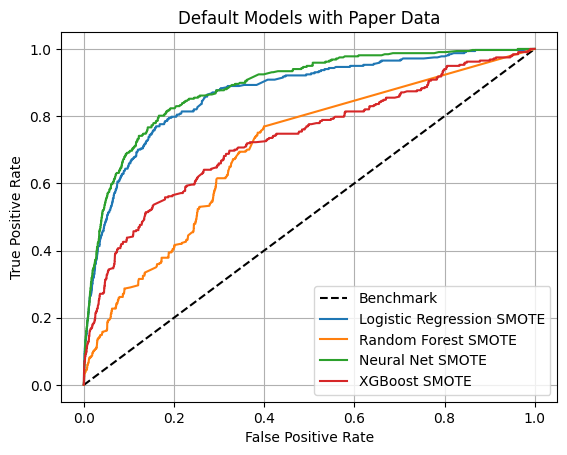

In [294]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    if "SMOTE" not in model_name:
        continue
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

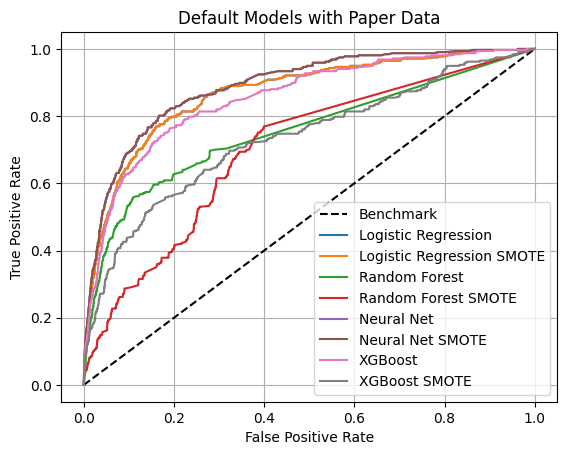

In [295]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in evaluation_tpr_fpr:
    plt.plot(evaluation_tpr_fpr[model_name][0], evaluation_tpr_fpr[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()